In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
training_data_path = 'D:/永豐攻房戰/30_Training Dataset_V2/training_data.csv'
training_data_df = pd.read_csv(training_data_path)
target = training_data_df[['單價']] # 1 target
target = target.to_numpy()
numeric_data = training_data_df[['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積']] # 12 features
numeric_data = numeric_data.to_numpy()
ids = training_data_df[['ID']]
ids = ids.to_numpy()
print(target.shape)
print(numeric_data.shape)
print(ids.shape)

(11751, 1)
(11751, 12)
(11751, 1)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler_X, scaler_Y = StandardScaler(), StandardScaler()
scaler_X.fit(numeric_data)
# scaler_Y.fit(target)
X_scaled = scaler_X.transform(numeric_data)
# Y_scaled = scaler_Y.transform(target)
print(scaler_X.mean_)
print(scaler_X.var_)
# print(scaler_Y.mean_)
# print(scaler_Y.var_)

[1.84163432e-02 7.43366522e+00 1.26026721e+01 2.13190580e+01
 3.05170691e-02 2.10302780e-02 6.38669049e-01 2.68260432e+05
 2.71911394e+06 2.66228740e-02 2.48760840e-02 2.36211399e-02]
[1.14968504e+00 2.58960124e+01 4.67817102e+01 2.08079068e+02
 1.17409323e+00 1.06229359e+00 4.59857781e-01 2.50633873e+09
 8.59487328e+09 1.16063641e+00 1.15005642e+00 1.38698118e+00]


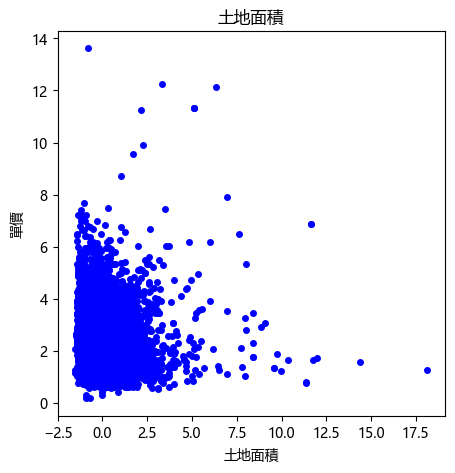

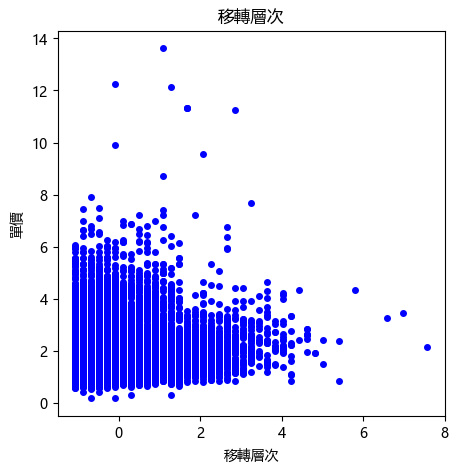

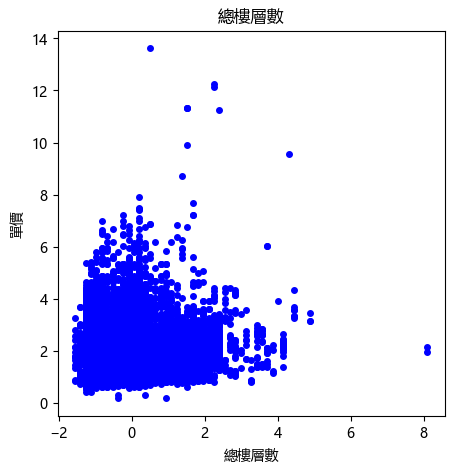

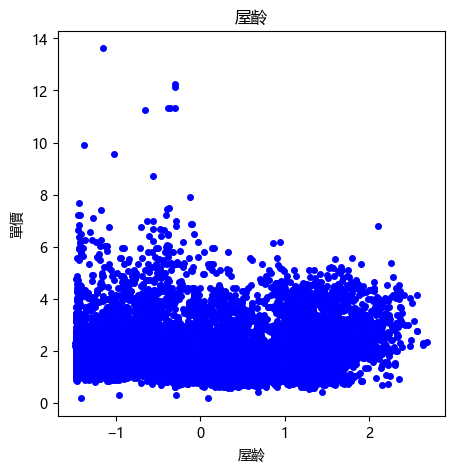

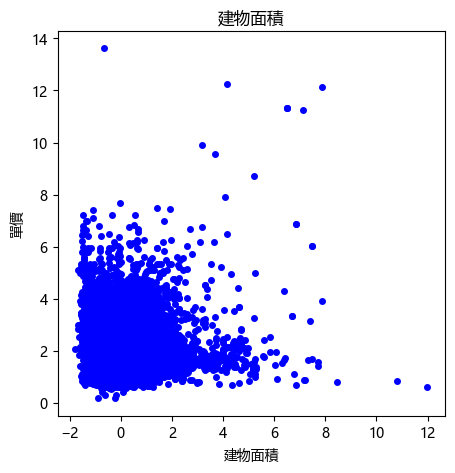

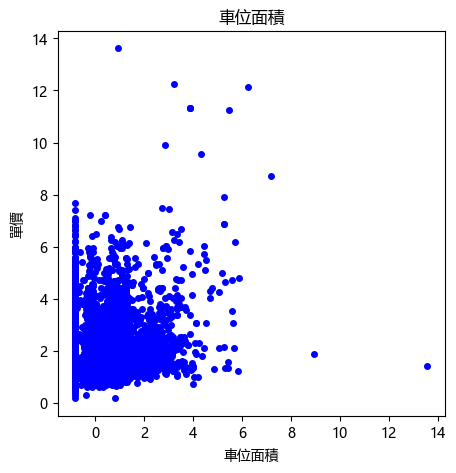

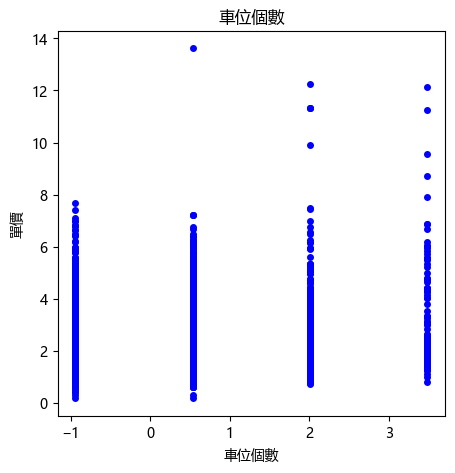

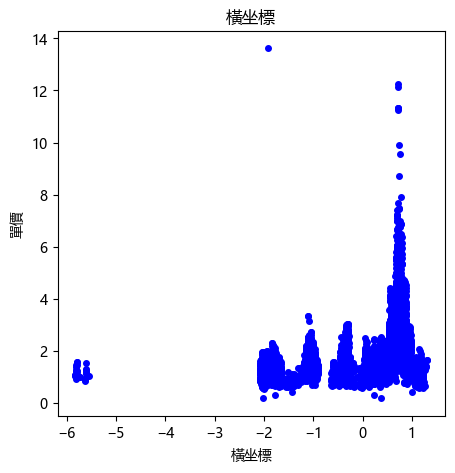

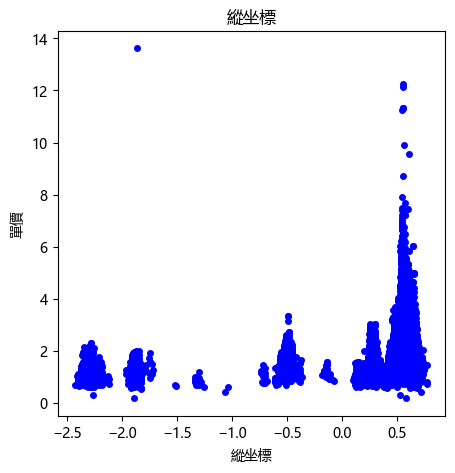

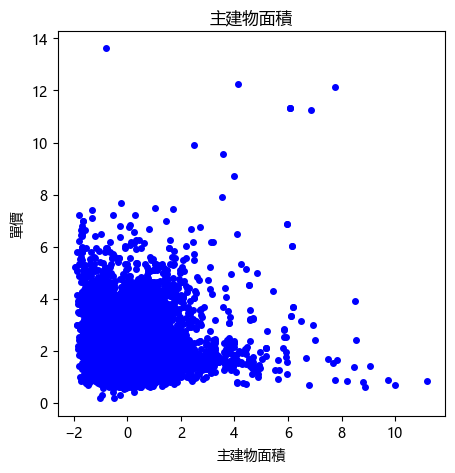

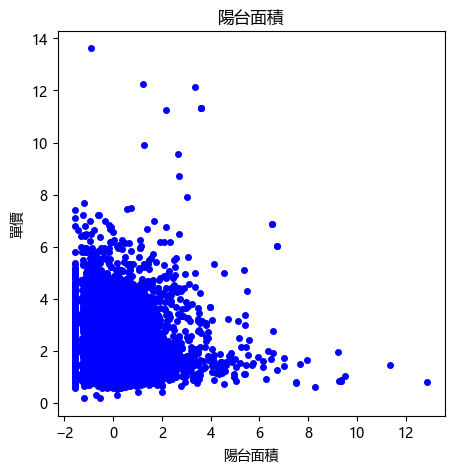

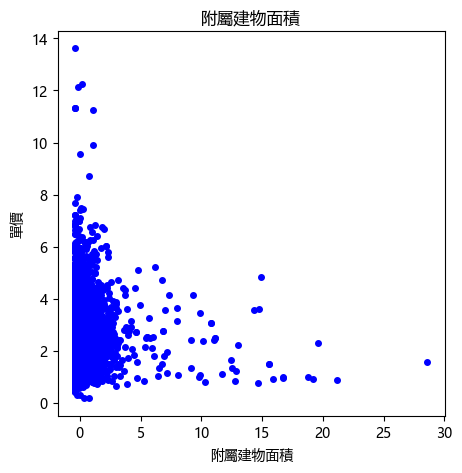

In [4]:
feature_names = ['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積']
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
for i, name in enumerate(feature_names):
    plt.figure(figsize=(5, 5))
    plt.plot(X_scaled[:, i], target[:, 0], 'bo', markersize=4)
    plt.title(name)
    plt.xlabel(name)
    plt.ylabel('單價')
    plt.show()

In [5]:
print(ids)

[['TR-1']
 ['TR-2']
 ['TR-3']
 ...
 ['TR-11749']
 ['TR-11750']
 ['TR-11751']]


In [7]:
np.save('./Numeric_feature_dataset/ids_train.npy', ids)
np.save('./Numeric_feature_dataset/features12_norm_train.npy', X_scaled)
np.save('./Numeric_feature_dataset/target_train.npy', target)

In [9]:
training_data_path = 'D:/永豐攻房戰/30_Public Dataset_Public Sumission Template_v2/public_dataset.csv'
training_data_df = pd.read_csv(training_data_path)
# target = training_data_df[['單價']] # 1 target
# target = target.to_numpy()
numeric_data = training_data_df[['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積']] # 12 features
numeric_data = numeric_data.to_numpy()
ids = training_data_df[['ID']]
ids = ids.to_numpy()
print(target.shape)
print(numeric_data.shape)
print(ids.shape)

scaler_X, scaler_Y = StandardScaler(), StandardScaler()
scaler_X.fit(numeric_data)
# scaler_Y.fit(target)
X_scaled = scaler_X.transform(numeric_data)
# Y_scaled = scaler_Y.transform(target)
print(scaler_X.mean_)
print(scaler_X.var_)
# print(scaler_Y.mean_)
# print(scaler_Y.var_)

np.save('./Numeric_feature_dataset/ids_test.npy', ids)
np.save('./Numeric_feature_dataset/features12_norm_test.npy', X_scaled)
# np.save('./Numeric_feature_dataset/target_test.npy', target)

(11751, 1)
(5876, 12)
(5876, 1)
[-2.86423853e-03  7.23825732e+00  1.22457454e+01  2.13765458e+01
 -2.53275986e-02 -2.52016885e-02  6.13852961e-01  2.68493522e+05
  2.71997898e+06 -1.55163666e-02 -2.22291415e-02 -3.60094645e-02]
[8.68566428e-01 2.34207692e+01 4.17319850e+01 2.06449802e+02
 8.46457366e-01 9.37779415e-01 4.31387401e-01 2.54072798e+09
 8.48995197e+09 8.64082790e-01 8.52409180e-01 5.21469453e-01]


In [10]:
from sklearn import preprocessing

training_data_path = 'D:/永豐攻房戰/30_Training Dataset_V2/training_data.csv'
training_data_df = pd.read_csv(training_data_path)
nonnumeric_data = training_data_df[['縣市', '鄉鎮市區', '路名', '主要用途', '主要建材', '建物型態']] # 6 features
nonnumeric_data = nonnumeric_data.to_numpy()
print(nonnumeric_data.shape)

labeled_all = []
for i in range(nonnumeric_data.shape[1]):
    labelen = preprocessing.LabelEncoder()
    labeled = labelen.fit_transform(nonnumeric_data[:, i])
    print(labelen.classes_)
    labeled_all.append(labeled)
labeled_all = np.vstack(labeled_all).reshape(-1, 6)
print(labeled_all.shape)
np.save('./NonNumeric_feature_dataset/nonnumeric6_labelen_train.npy', labeled_all)

(11751, 6)
['台中市' '台北市' '台南市' '嘉義市' '嘉義縣' '基隆市' '宜蘭縣' '屏東縣' '彰化縣' '新北市' '新竹市' '新竹縣'
 '桃園市' '花蓮縣' '苗栗縣' '金門縣' '雲林縣' '高雄市']
['七堵區' '三峽區' '三民區' '三重區' '中區' '中和區' '中壢區' '中山區' '中正區' '中西區' '五結鄉' '五股區'
 '仁德區' '仁愛區' '仁武區' '信義區' '內埔鄉' '內湖區' '八德區' '八里區' '冬山鄉' '前金區' '前鎮區' '北區'
 '北屯區' '北投區' '南區' '南屯區' '南港區' '吉安鄉' '員山鄉' '員林市' '善化區' '嘉義市' '土城區' '士林區'
 '大同區' '大園區' '大安區' '大溪區' '大肚區' '大里區' '大雅區' '太平區' '安南區' '安平區' '安樂區' '宜蘭市'
 '寶山鄉' '小港區' '屏東市' '岡山區' '左營區' '平鎮區' '彰化市' '文山區' '斗南鎮' '新埔鎮' '新市區' '新店區'
 '新營區' '新竹市' '新興區' '新莊區' '新豐鄉' '暖暖區' '朴子市' '東區' '松山區' '板橋區' '林口區' '桃園區'
 '楊梅區' '楠梓區' '樹林區' '橋頭區' '歸仁區' '民雄鄉' '永和區' '永康區' '汐止區' '泰山區' '淡水區' '深坑區'
 '清水區' '湖口鄉' '潭子區' '潮州鎮' '烏日區' '瑞芳區' '礁溪鄉' '神岡區' '竹北市' '竹南鎮' '竹東鎮' '羅東鎮'
 '花蓮市' '苓雅區' '萬華區' '萬里區' '蘆洲區' '蘆竹區' '虎尾鎮' '西區' '西屯區' '觀音區' '豐原區' '金城鎮'
 '金寧鄉' '金山區' '金沙鎮' '金湖鎮' '霧峰區' '頭份市' '頭城鎮' '鳥松區' '鳳山區' '鶯歌區' '鹽埕區' '鼓山區'
 '龍井區' '龍潭區' '龜山區']
['一心二路' '一心街' '七和一街' ... '龍門路' '龍陵路' '龍鳳三街']
['一般事務所' '住商用' '住家用' '住工用' '其他' '商業用' '國民住宅' '工業用' '店鋪' '廠房' '辦公室' '集合住宅']
['其他' '加強磚造' 